In [100]:
import pandas as pd
import numpy as np
import re
#import matplotlib.pyplot as plt
import math


PATH='~/Desktop/Crime analysis/'
FILE='MurderPerYear.xls'
crm = pd.read_excel(PATH+FILE, sheetname = "Sheet2")

In [87]:
crm

,Burundi,Comoros,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Malawi,Mauritius,Mayotte,...,Nauru,Palau,Cook Islands,French Polynesia,Niue,Samoa,Tonga,Tuvalu,Australia,New Zealand****
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.481292,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.023734,NaN,1.727872,1.094474
1,NaN,NaN,NaN,NaN,NaN,4.050821,0.731843,3.312481,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.995490,0.000000,1.511097,1.103271
2,NaN,9.429287,8.156673,9.109533,9.416953,3.564453,1.782356,1.568893,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.965972,0.000000,1.277481,1.475319
3,NaN,NaN,NaN,NaN,NaN,3.544065,4.631860,6.261257,NaN,0.543401,...,NaN,NaN,NaN,1.164004,NaN,NaN,7.881230,0.000000,1.363665,1.170126
4,NaN,NaN,NaN,NaN,NaN,3.438876,3.004486,5.111726,NaN,14.203051,...,NaN,NaN,NaN,2.688575,NaN,NaN,0.978770,0.000000,1.215678,1.132604
5,3.865426,NaN,NaN,NaN,NaN,3.694655,3.061204,5.609626,NaN,2.547381,...,NaN,NaN,NaN,3.423654,NaN,NaN,3.890445,0.000000,1.221318,1.190093
6,4.114782,NaN,NaN,NaN,NaN,5.648079,0.687949,2.233225,3.057233,5.925838,...,NaN,NaN,NaN,0.376773,NaN,8.662696,7.735747,0.000000,1.208046,1.547657
7,3.667643,8.420002,7.596774,8.302038,8.472549,5.551931,0.616712,3.520692,2.644335,NaN,...,NaN,NaN,NaN,NaN,NaN,8.600810,0.962029,10.176046,1.042284,0.984201
8,3.564807,NaN,NaN,NaN,NaN,6.376154,NaN,2.252605,2.713295,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.915856,10.158472,1.100150,0.885461
9,4.454509,NaN,NaN,NaN,NaN,6.489908,NaN,1.777021,NaN,NaN,...,1.310986,3.112729,3.061191,NaN,3.067508,NaN,0.954481,20.283976,1.060609,0.924280


In [125]:
crmt = crm.transpose()


In [126]:
crmt

,0,1,2,3,4,5,6,7,8,9,10,11,12
Burundi,NaN,NaN,NaN,NaN,NaN,3.865426,4.114782,3.667643,3.564807,4.454509,3.974791,4.030745,NaN
Comoros,NaN,NaN,9.429287,NaN,NaN,NaN,NaN,8.420002,NaN,NaN,NaN,NaN,7.595274
Djibouti,NaN,NaN,8.156673,NaN,NaN,NaN,NaN,7.596774,NaN,NaN,NaN,NaN,6.773592
Eritrea,NaN,NaN,9.109533,NaN,NaN,NaN,NaN,8.302038,NaN,NaN,NaN,NaN,7.458196
Ethiopia,NaN,NaN,9.416953,NaN,NaN,NaN,NaN,8.472549,NaN,NaN,NaN,NaN,7.598304
Kenya,NaN,4.050821,3.564453,3.544065,3.438876,3.694655,5.648079,5.551931,6.376154,6.489908,6.586885,5.904566,5.750234
Madagascar,NaN,0.731843,1.782356,4.631860,3.004486,3.061204,0.687949,0.616712,NaN,NaN,NaN,NaN,NaN
Malawi,2.481292,3.312481,1.568893,6.261257,5.111726,5.609626,2.233225,3.520692,2.252605,1.777021,NaN,NaN,NaN
Mauritius,NaN,NaN,NaN,NaN,NaN,NaN,3.057233,2.644335,2.713295,NaN,NaN,NaN,NaN
Mayotte,NaN,NaN,NaN,0.543401,14.203051,2.547381,5.925838,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import Imputer

pca = PCA(svd_solver='full', n_components=10)
fAn = FactorAnalysis(n_components=10)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(crm)
newdata = imp.transform(crm)
pca.fit(newdata)
fAn.fit(newdata)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=10,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [152]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(crmt)
newdata2 = imp.transform(crmt)
pca.fit(newdata2)
fAn.fit(newdata2)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=10,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

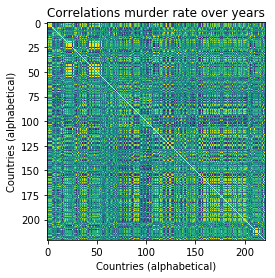

In [159]:
res2 = np.corrcoef(newdata2, rowvar = True)
#plt.clf()
#plt.xlabel("Countries (alphabetical)")
#plt.ylabel("Countries (alphabetical)")
#plt.title('Correlations murder rate over years')
#plt.imshow(res2)
#plt.show()

In [147]:
pca.fit(newdata2)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [153]:
pca.explained_variance_ratio_

array([ 0.83693187,  0.04768395,  0.03183653,  0.02068251,  0.0174821 ,
        0.01095911,  0.00916676,  0.0065056 ,  0.00548413,  0.00443542])

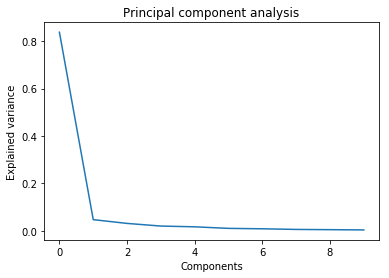

In [160]:
#plt.plot(pca.explained_variance_ratio_)
#plt.xlabel("Components")
#plt.ylabel("Explained variance")
#plt.title('Principal component analysis')
#plt.show()

In [166]:
np.savetxt("PCAResults", pca.explained_variance_ratio_, delimiter =",")
np.savetxt("Correlations", res2, delimiter =",")
np.savetxt("ImputedData", newdata2, delimiter =",")